In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./data/heart_disease.csv')

data.sample(3)

,id,running,smoking,disease
213,214,70.085196,10.382646,2.239217
114,115,2.136343,25.840130,19.242688
43,44,23.933005,4.185869,10.894457


In [43]:
data.shape

(498, 4)

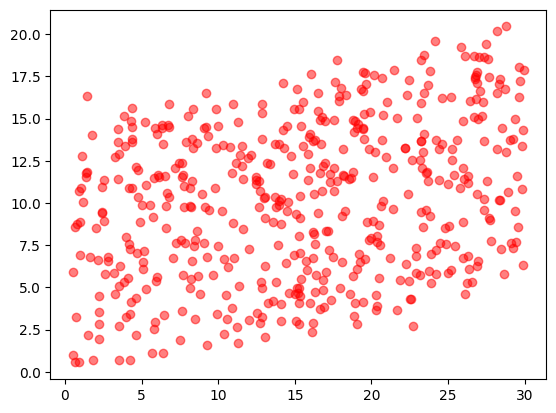

In [44]:
plt.plot(data.smoking, data.disease, 'ro', alpha=0.5)

In [71]:
def pred(a, b, x):
    return a * x + b

def get_loss(y_pred, y):
    return ((y_pred - y) ** 2).mean()

def grad(x, y, y_pred):
    da = 2 * (x * (y_pred - y)).mean()
    db = 2 * ((y_pred - y)).mean()
    return (da, db)

In [72]:
def vis(a, b):
    y_pred = pred(a, b, data.smoking.to_numpy())
    plt.plot(data.smoking, data.disease, 'ro', alpha=0.5)
    plt.plot(data.smoking, y_pred, 'b-', alpha=0.5)
    plt.xlim(0, 30)
    plt.ylim(0, 20)
    plt.ylabel('Disease')
    plt.xlabel('Smoking')

7.739560485559633 4.388784397520523


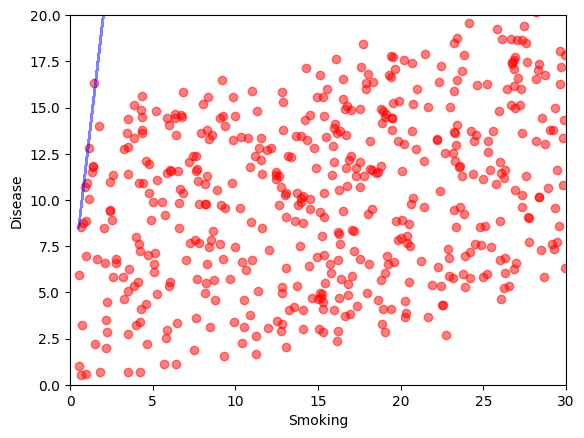

In [108]:
rng = np.random.default_rng(42)
a = rng.uniform(0, 10)
b = rng.uniform(0, 10)

vis(a, b)
print(a, b)
plt.show()

In [109]:
epochs = 100
lr = 0.0001

loss_h = []
line_h = []

x = data.smoking.to_numpy()
y = data.disease.to_numpy()

for i in range(epochs):
    y_pred = pred(a, b, x)
    loss = get_loss(y_pred, y)

    loss_h.append(loss)

    da, db = grad(x, y, y_pred)
    
    a -= lr * da
    b -= lr * db

    line_h.append((a, b))

print(a, b)

0.3601408210455527 4.0330194028337125


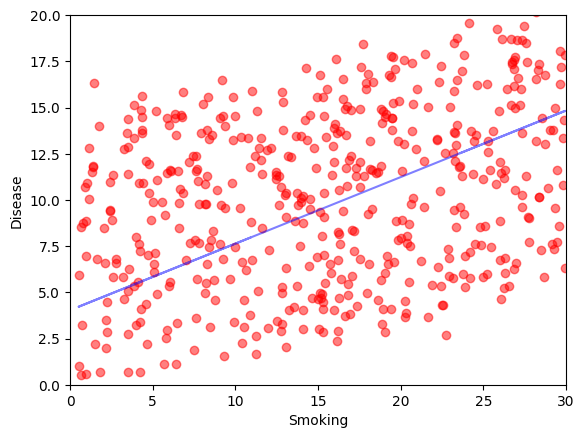

In [110]:
vis(a, b)

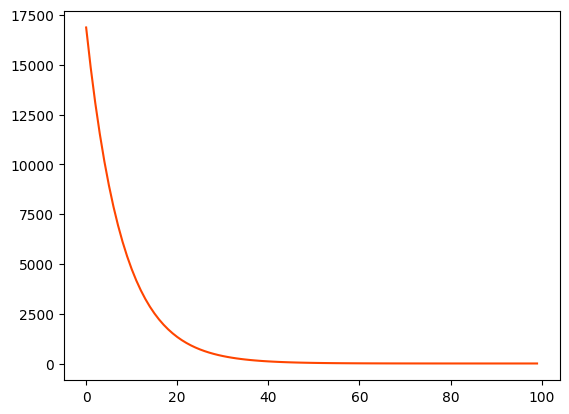

In [111]:
eph = np.arange(epochs)
plt.plot(eph, loss_h, 'orangered')

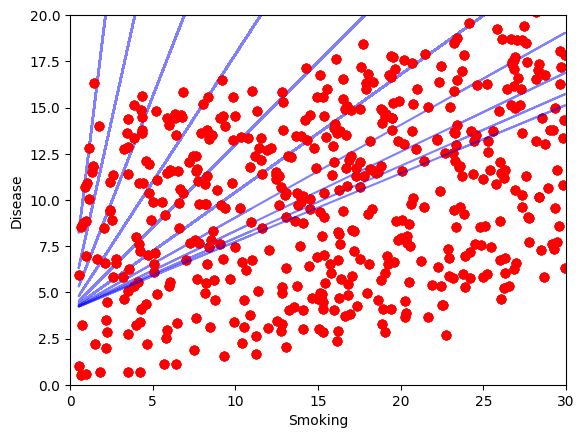

In [112]:
for i in range(0, epochs, 10):
    a, b = line_h[i]
    vis(a, b)